# Imports

In [1]:
from env import user, password, host

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import acquire
import prepare

# Acquire Data

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


# Prepare

## Split Data into train, test, validate
Random seed has been set to 123 and train size for the train size is set at .8 for both the train test split and the validate split.

## Clean the Data

- Surprisingly, it looks like we don't have any nulls within the data
- We can patch out the type id's, since they were only useful for merging
    * We could've also done this in SQL, but I prefer getting to python as soon as possible
- Fields to look at:
    * gender: Currently an object, likely needs to be encoded
    * senior_citizen: It's an int type, does that mean it's encoded already?
    * partner: I have no clue what this field is for
    * dependents: Currently an object, either it's a bool or should be an int identifying how many dependents
    * phone_service - paperless_billing: Needs to be encoded
    * total_charges: Definitely should not be an object, likely needs to be a float
    * churn: Probably needs to be encoded

In [4]:
train, test, validate = prepare.prep_telco(telco, .8, 123)

In [5]:
train.sample(4)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2281,7816-VGHTO,Female,0,Yes,Yes,6,No,No phone service,No,Yes,...,Yes,No,No,No,40.55,217.50,No,Two year,DSL,Mailed check
79,0774-IFUVM,Male,0,Yes,Yes,11,Yes,Yes,Yes,No,...,No,Yes,No,Yes,65.15,723.35,No,Month-to-month,DSL,Bank transfer (automatic)
2751,1597-LHYNC,Female,1,No,No,26,Yes,Yes,Yes,Yes,...,No,No,Yes,Yes,95.00,2497.20,Yes,Month-to-month,Fiber optic,Electronic check
2369,9227-YBAXE,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,82.50,5215.10,No,Two year,DSL,Bank transfer (automatic)


In [6]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 21)
(1409, 21)
(1127, 21)


In [7]:
train.dtypes

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges            float64
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [8]:
train.churn.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
train.contract_type.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [10]:
# encoder = LabelEncoder()
# encoder.fit(train.contract_type)
# train["contract_type_encoded"] = encoder.transform(train.contract_type)
# test["contract_type_encoded"] = encoder.transform(test.contract_type)
# validate["contract_type_encoded"] = encoder.transform(validate.contract_type)

In [11]:
def encode_contract_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.contract_type)
    train["contract_type_encoded"] = encoder.transform(train.contract_type)
    test["contract_type_encoded"] = encoder.transform(test.contract_type)
    validate["contract_type_encoded"] = encoder.transform(validate.contract_type)
    return encoder, train, test, validate

In [12]:
def encode_internet_service_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.internet_service_type)
    train["internet_service_type"] = encoder.transform(train.internet_service_type)
    test["internet_service_type"] = encoder.transform(test.internet_service_type)
    validate["internet_service_type"] = encoder.transform(validate.internet_service_type)
    return encoder, train, test, validate

In [13]:
def train, test, calidate = encode_contract_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.payment_type)
    train["payment_type_encoded"] = encoder.transform(train.payment_type)
    test["payment_type_encoded"] = encoder.transform(test.payment_type)
    validate["payment_type_encoded"] = encoder.transform(validate.payment_type)
    return encoder, train, test, validate

In [14]:
def encode_churn(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.churn)
    train["churn_encoded"] = encoder.transform(train.churn)
    test["churn_encoded"] = encoder.transform(test.churn)
    validate["churn_encoded"] = encoder.transform(validate.churn)
    return encoder, train, test, validate

In [31]:
def encoded_df(train, test, validate):
    encoder_1, train, test, validate = encode_contract_types(train, test, validate)
    encoder_2, train, test, validate = encode_internet_service_types(train, test, validate)
    encoder_3, train, test, validate = encode_churn(train, test, validate)
    return encoder_1, encoder_2, encoder_3, train, test, validate

In [32]:
encoder_1, encoder_2, encoder_3, train, test, validate = encoded_df(train, test, validate)

In [33]:
train.sample(4)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_encoded,churn_encoded
1048,8474-UMLNT,Female,0,No,No,13,Yes,No,Yes,Yes,...,Yes,No,67.80,842.25,No,Month-to-month,0,Bank transfer (automatic),0,0
6644,3642-BYHDO,Female,0,Yes,Yes,71,Yes,No,No internet service,No internet service,...,No internet service,No,19.90,1389.35,No,Two year,2,Bank transfer (automatic),2,0
1677,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,No,Yes,...,Yes,Yes,65.90,660.05,No,One year,0,Mailed check,1,0
1660,7670-ZBPOQ,Female,0,Yes,No,58,Yes,Yes,Yes,No,...,No,Yes,61.05,3478.75,No,One year,0,Bank transfer (automatic),1,0


In [34]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 23)
(1409, 23)
(1127, 23)


# Explore

Our positive is churning and negative is not churning

- Look at groupings of customers who are churning and are not churning:

- Create a swarmplot, boxplot and heatmap of correlations:

- Is there a clear pattern? Any ideas on what is going on?

## Correlation heatmap

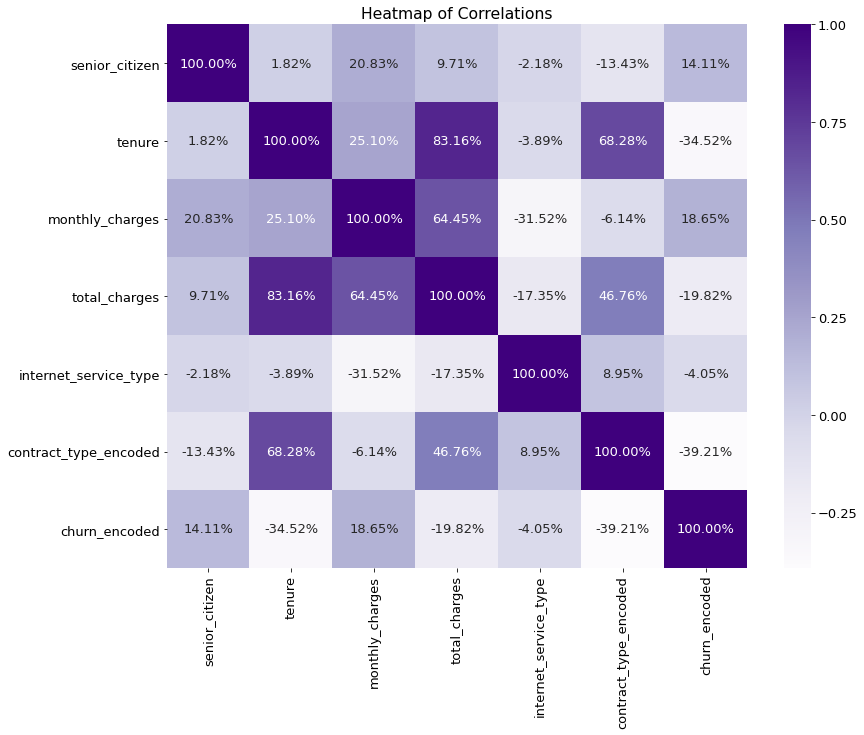

In [45]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)
plt.title("Heatmap of Correlations")
sns.heatmap(train.corr(), annot=True, cmap='Purples', fmt='.2%')

<function matplotlib.pyplot.show(*args, **kw)>

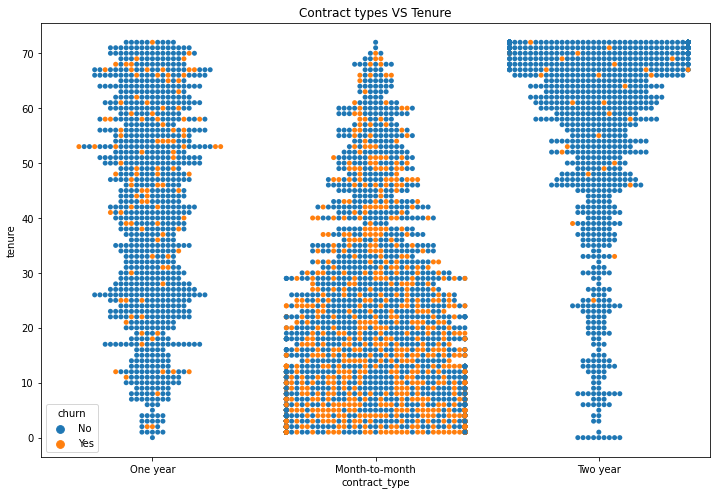

In [17]:
plt.figure(figsize=(12, 8))
plt.title("Contract types VS Tenure")
sns.swarmplot(x="contract_type", y="tenure", data=train, hue="churn")

plt.show

Takeaways: 
   - Month to Month seem to be churning a lot more than the other contract types
   - Two year seem to be churning after the roughly the 25 month marker
   - One Year seem evenly distributed in regards to churning
    
Next steps:
   - Take a look at the distribution of monthly charges per contract type
   - Types of service per contract
   - Age distribution per contract
   - payment type per contract
    


<function matplotlib.pyplot.show(*args, **kw)>

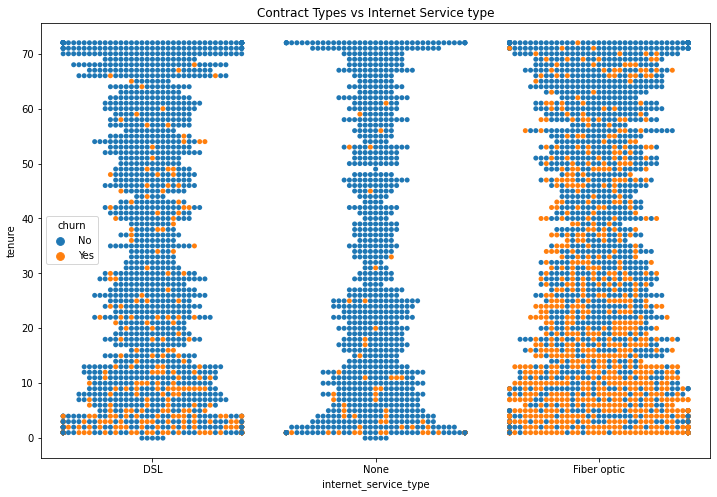

In [18]:
plt.figure(figsize=(12, 8))

# plt.subplot(2, 2, 1)
# plt.title("Contract Types vs Monthly Charges")
# sns.boxplot(x="monthly_charges", y="tenure", data=train, hue="churn")

# plt.subplot(2, 2, 2)
plt.title("Contract Types vs Internet Service type")
sns.swarmplot(x="internet_service_type", y="tenure", data=train, hue="churn")

# plt.subplot(2, 2, 2)
# plt.title("Contract Types vs Phone Service")
# sns.swarmplot(x="phone_service", y="tenure", data=train, hue="churn")


plt.show

Takeaways:
   - Fiber Optics is more likely to churn - this is surprising
   - No Internet is least likely to churn
   - for DSL and No Internet the longer they are customers they less likely they are to churn
   
Next Steps:
 - 

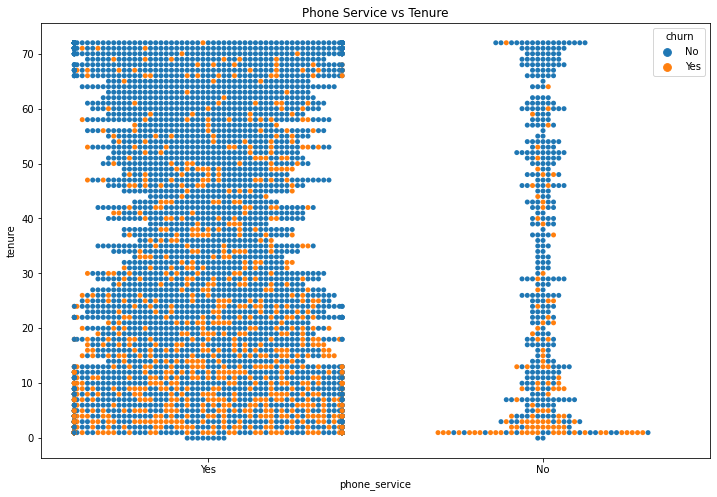

In [19]:
plt.figure(figsize=(12, 8))
plt.title("Phone Service vs Tenure")
sns.swarmplot(x="phone_service", y="tenure", data=train, hue="churn")